## Playwing - Python Test Task [BI Engineer]

#### Need to prepare python code that will create revenue report for Active servers for last 7 days (daily) + Total for last 7 days. 
#### Data for reports can be found in tabs "active_servers" and "revenue_details".
#### Results should be generated in CSV or MS Excel format.
#### Scripts can upload to your personal repository with public access or provided in the archive.

In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [322]:
sheet_id = '15y-AMfHw33601FGF7j7MkkGuKG3XI54z8gyc4WnGp_g'
sheet_name = 'revenue_details'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [323]:
sheet_id = '15y-AMfHw33601FGF7j7MkkGuKG3XI54z8gyc4WnGp_g'
sheet_name = 'active_servers'
url_active_servers = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [324]:
active_servers = pd.read_csv(url_active_servers)
active_servers = active_servers.loc[:, ~active_servers.columns.str.contains('^Unnamed')]

In [325]:
df = pd.read_csv(url)

In [326]:
nan_mean = df.isna().mean()
nan_mean

Date           0.0
Server         0.0
Revenue_USD    0.0
dtype: float64

In [327]:
# Checking data types in the dataset. We see that the Date column is of type object, which is incorrect. 
#We need to fix the type of this column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         180 non-null    object
 1   Server       180 non-null    object
 2   Revenue_USD  180 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [328]:
# Correcting the type of this column
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [329]:
# Description of numeric values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Revenue_USD,180.0,48.883333,30.389515,0.0,20.5,48.5,77.5,99.0


In [330]:
# Filtering the required servers
df = df[df['Server'].isin(list(active_servers['Server']))]

In [331]:
df['rank'] = df.groupby('Server')['Date'].rank(method='dense', ascending=False)

In [332]:
# Filtering the last 7 days
# We can also use this method to find data: df.groupby(['Date','Server','Revenue_USD'], as_index = False).agg({'rank':'max'}).groupby('Server').tail(7)
df = df[df['rank'].between(1, 7)]

In [336]:
# Revenue report for Active servers for last 7 days (daily) 
df.drop(columns = ['rank'])#.to_csv('C:/Users/Revenue report for Active servers for last 7 days (daily).csv', index = False)

,Date,Server,Revenue_USD
47,2023-06-12,Server - 3,38
48,2023-06-13,Server - 3,58
49,2023-06-14,Server - 3,43
50,2023-06-15,Server - 3,7
51,2023-06-16,Server - 3,25
52,2023-06-17,Server - 3,66
53,2023-06-18,Server - 3,75
83,2023-06-12,Server - 5,84
84,2023-06-13,Server - 5,65
85,2023-06-14,Server - 5,85


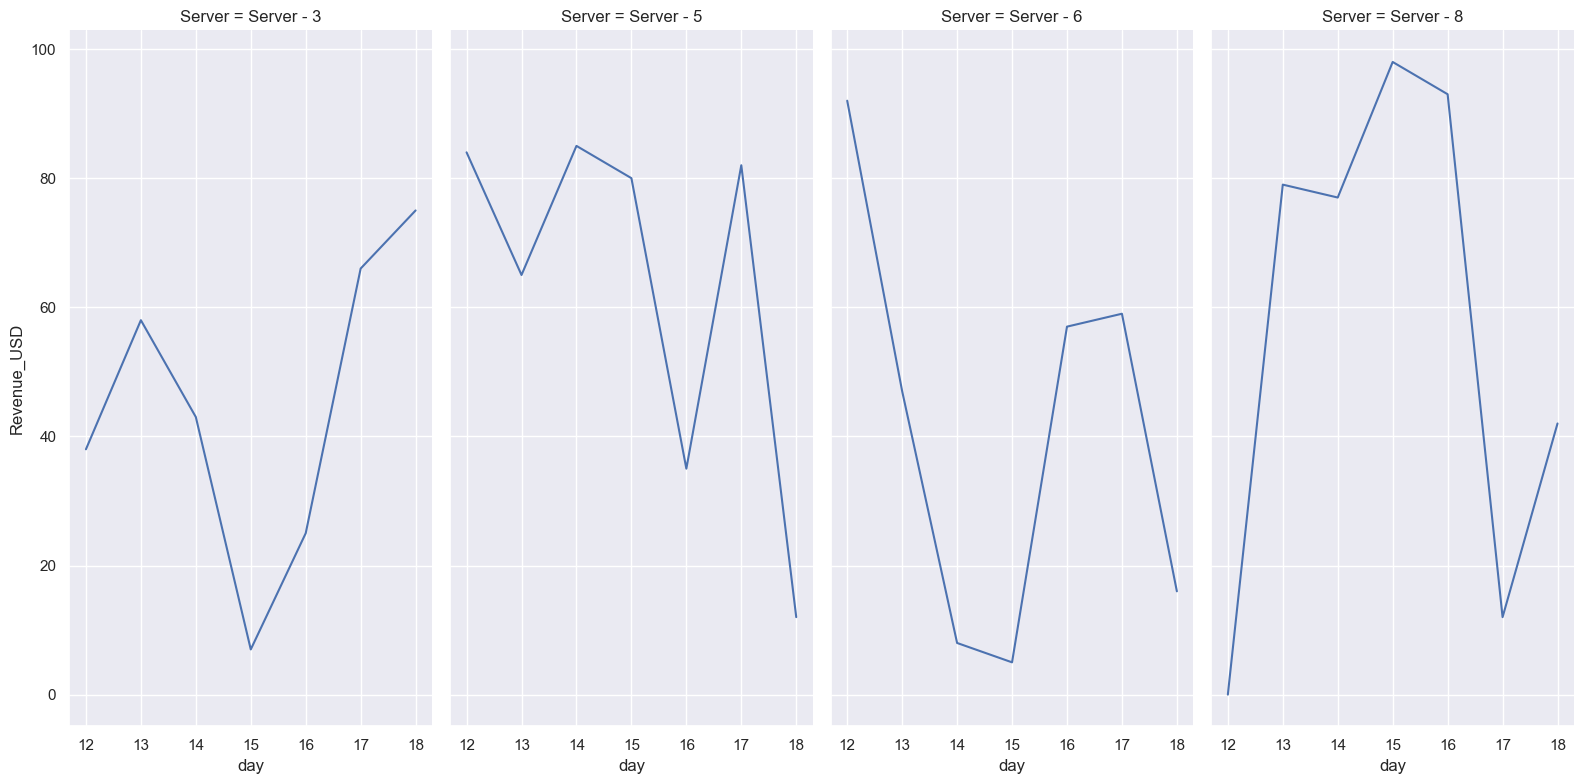

In [337]:
# Revenue report for Active servers for last 7 days (daily) - Plot
df['day'] = df['Date'].apply(lambda x : x.day)
graph = sns.FacetGrid(df, col ="Server", height=8, aspect=0.5)
graph.map(plt.plot, "day", "Revenue_USD")
plt.show()

In [338]:
df=df.assign(Total_for_last_7_days=df.groupby('Server')['Revenue_USD'].transform('sum')) \
  .sort_values('Server')

In [345]:
# Total revenue for Active servers for last 7 days
df.drop(columns = ['rank','day']).sort_values('Server')#.to_csv('C:/Users/Total revenue for Active servers for last 7 days.csv', index = False)

,Date,Server,Revenue_USD,Total_for_last_7_days
47,2023-06-12,Server - 3,38,312
48,2023-06-13,Server - 3,58,312
49,2023-06-14,Server - 3,43,312
50,2023-06-15,Server - 3,7,312
51,2023-06-16,Server - 3,25,312
52,2023-06-17,Server - 3,66,312
53,2023-06-18,Server - 3,75,312
83,2023-06-12,Server - 5,84,443
84,2023-06-13,Server - 5,65,443
89,2023-06-18,Server - 5,12,443


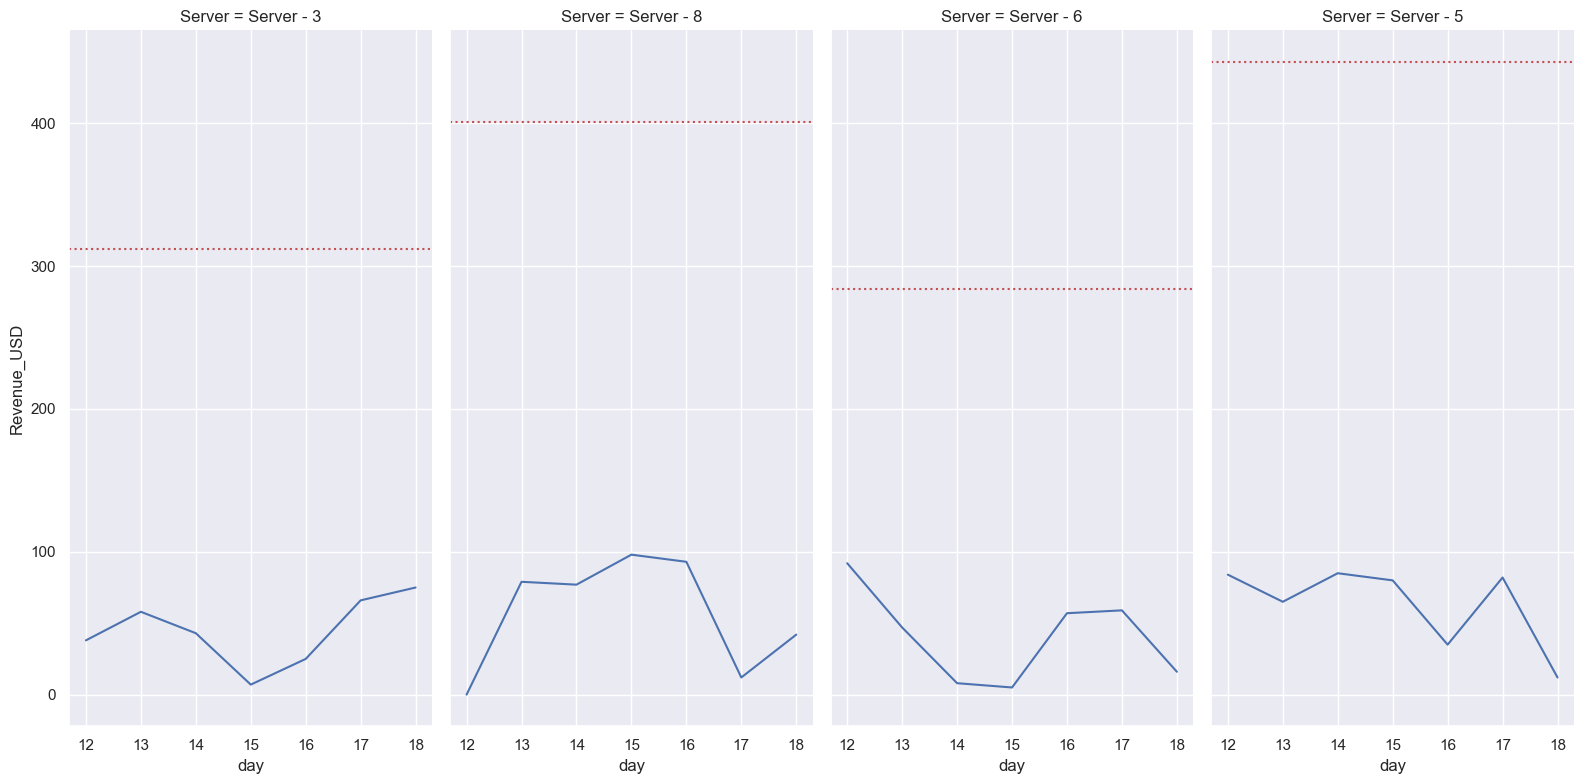

In [346]:
# Total revenue for Active servers for last 7 days - Plot
# Red line is total revenue for Server, blue line is daily dynamics
df = df.sort_values('Date')
graph = sns.FacetGrid(df, col ="Server", height=8, aspect=0.5)
graph.map(plt.plot, "day", "Revenue_USD")

line_position = list(df['Total_for_last_7_days'].unique())

for ax, pos in zip(graph.axes.flat, line_position):
    ax.axhline(y=pos, color='r', linestyle=':')

plt.show()